# Required Dependencies 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('.config/plot_default_config.mplstyle')
%matplotlib inline

# Load Data 

In [5]:
df = pd.read_csv("./data/credit.csv")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


# Basic Summary 

- 1000 subjects included in sample 
- 21 column attributes ( 20 dependent variables and 1 independent )


In [6]:
print(df.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


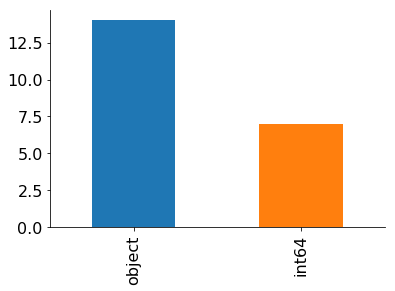

In [7]:
# Column attributes by data type
df.dtypes.value_counts().plot(kind='bar')

In [8]:
# Check for missing data 
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

# Data Quality 

- No missing values
- Females are under represented ( this could cause some problems in generalizing credit risk ) 
- Non-Foriegn workers are under represented 

These categorical features provide a detailed profile of the sample population: Predominently single male foreign skilled laborers with less than $100 in savings applying for credit to apply towards a range of goods. This brings up concerns if end user is attempting to apply a model trained from this to a general population. 

### Numeric Data

In [50]:
def seperation_plot(data: pd.DataFrame, column: str):
    """
    Produce a KDE of class seperation as a function of input column
    """
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    sns.distplot(df.loc[df['class']=="good", column], color='b', ax=ax)
    sns.distplot(df.loc[df['class']=="bad", column], color='r', ax=ax)
    ax.legend(['Good Credit', "Bad Credit"])
    ax.set_title(column)
    return fig, ax 

/Users/calebdowdy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


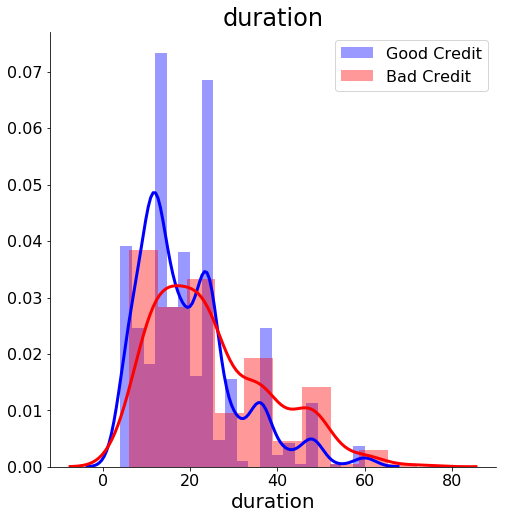

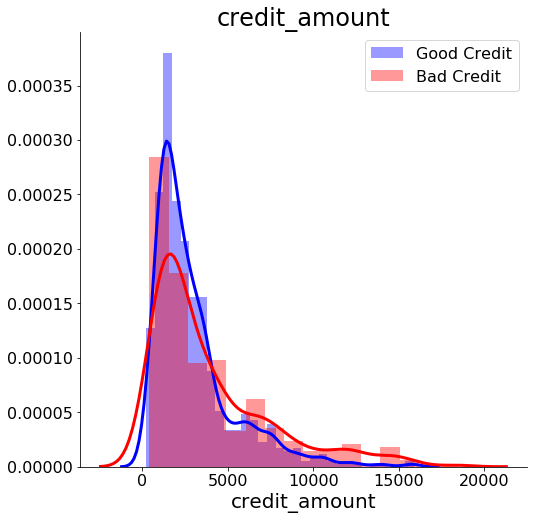

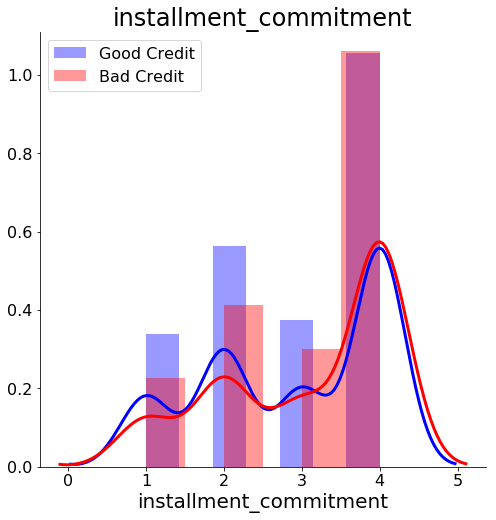

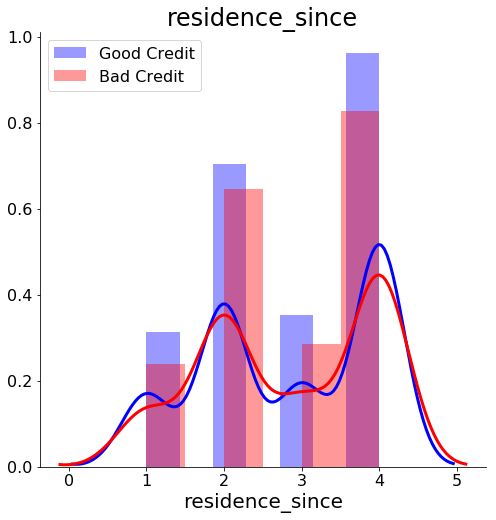

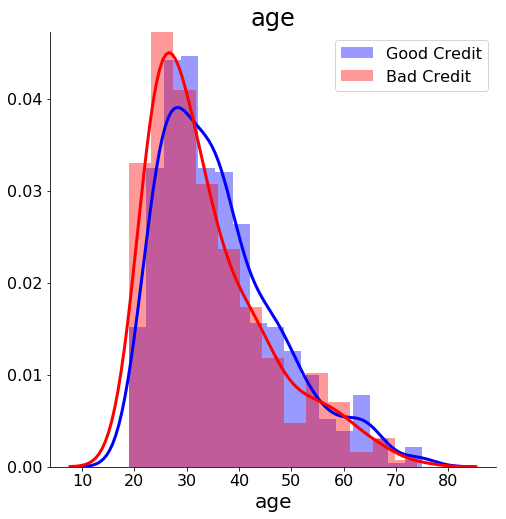

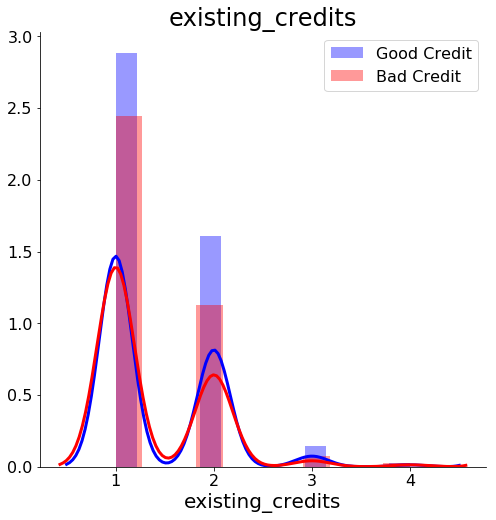

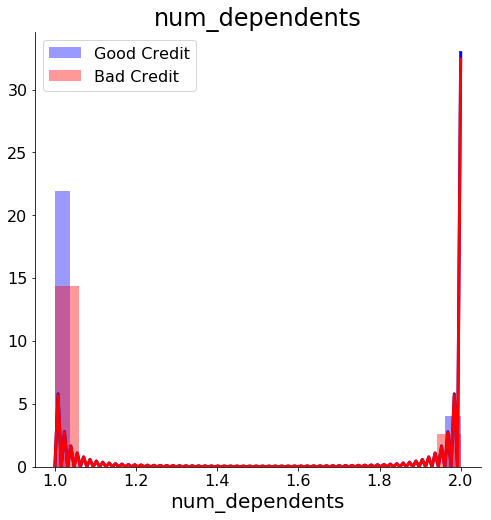

In [51]:
# Iterate through all the numeric data columns and plot the class seperation
for col in df.select_dtypes(include=['int']).columns:
    seperation_plot(df, col)

### Categorical Data

In [52]:
def categorical_plot(data: pd.DataFrame, column:str):
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    df[column].value_counts().plot(kind="bar", title=column, ax=ax)
    return fig, ax

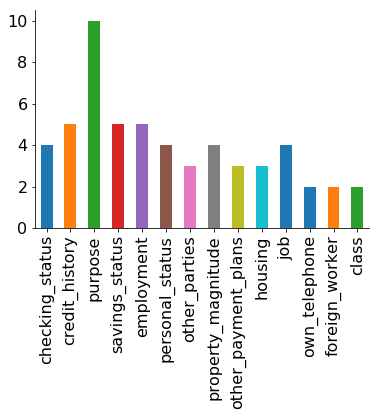

In [53]:
# For each categorical column attribute display the number of unique values
df.select_dtypes(include='object').nunique().plot(kind='bar')

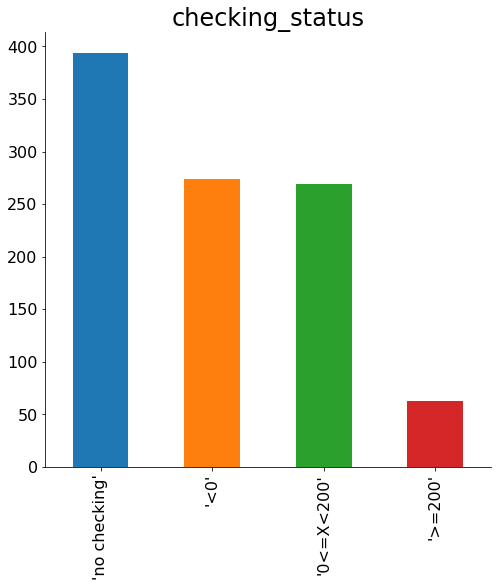

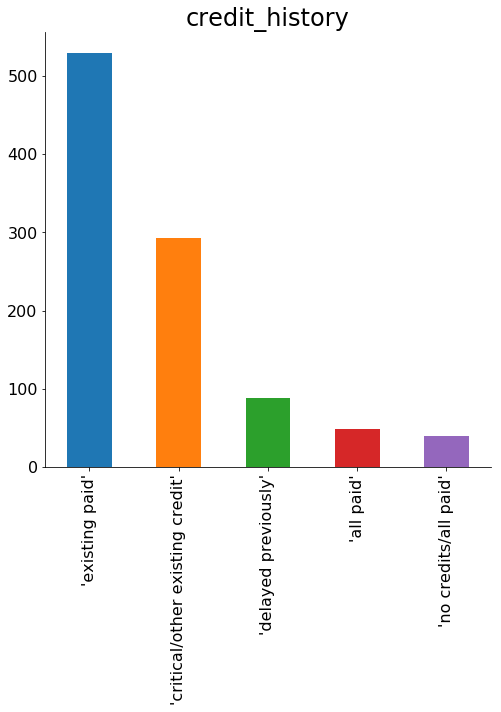

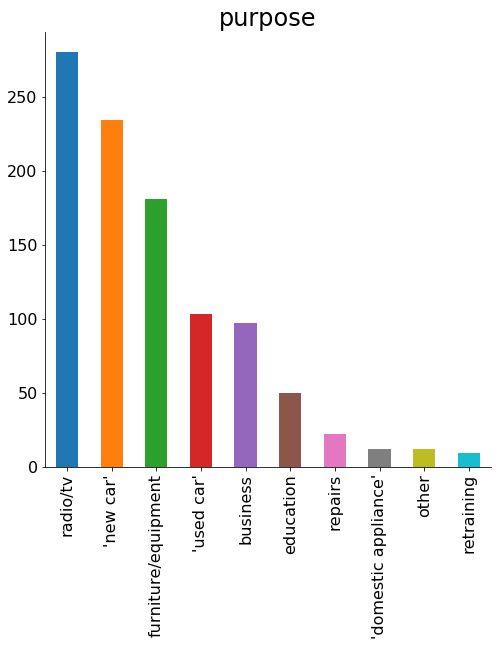

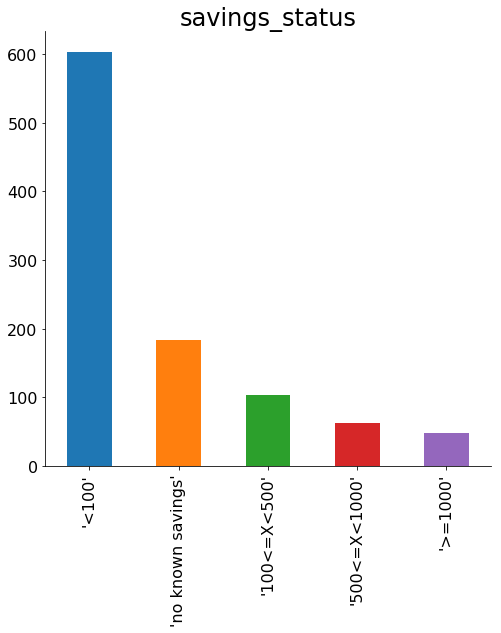

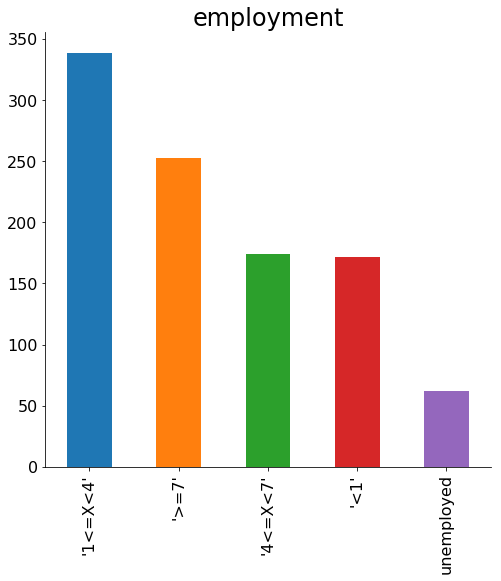

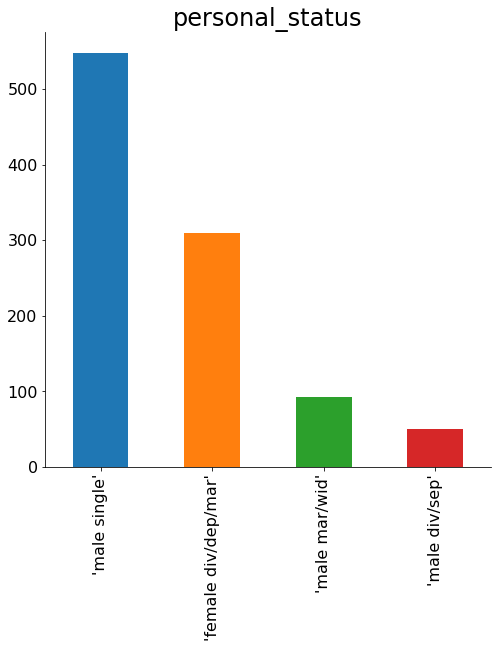

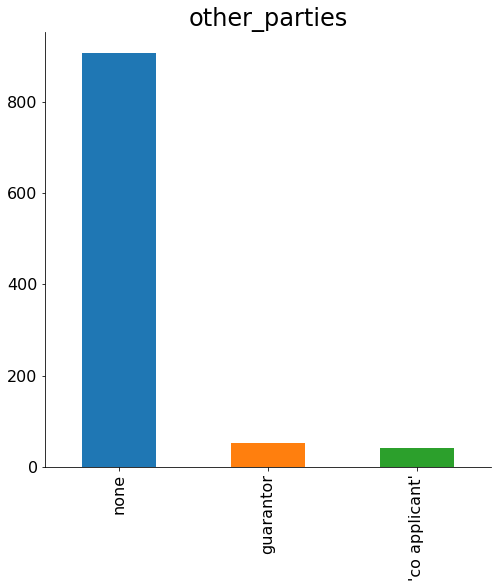

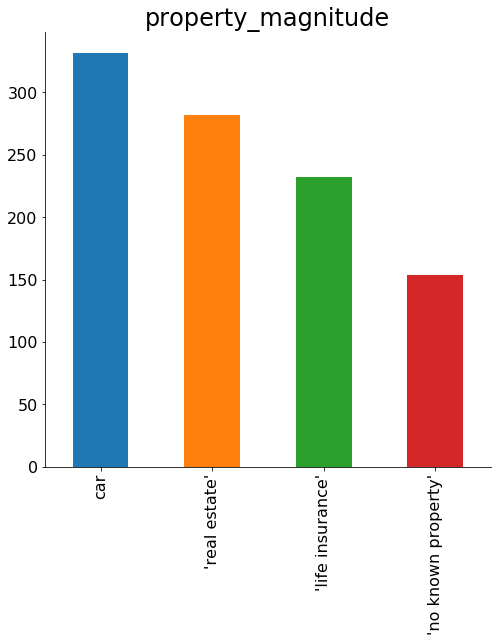

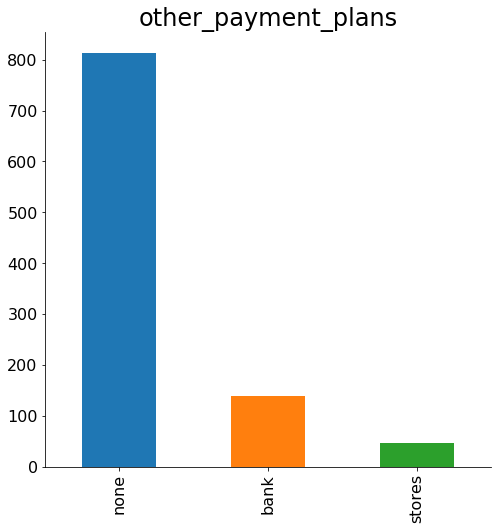

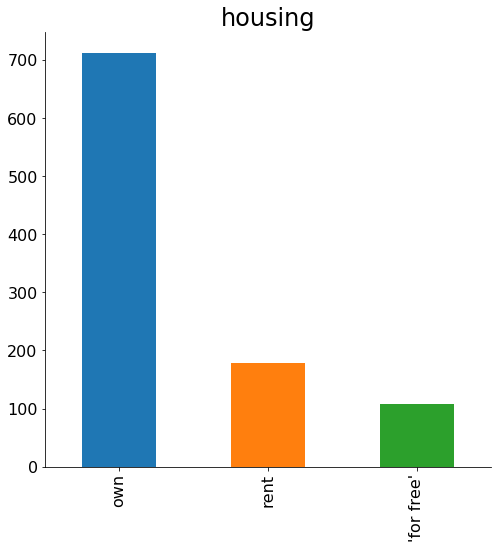

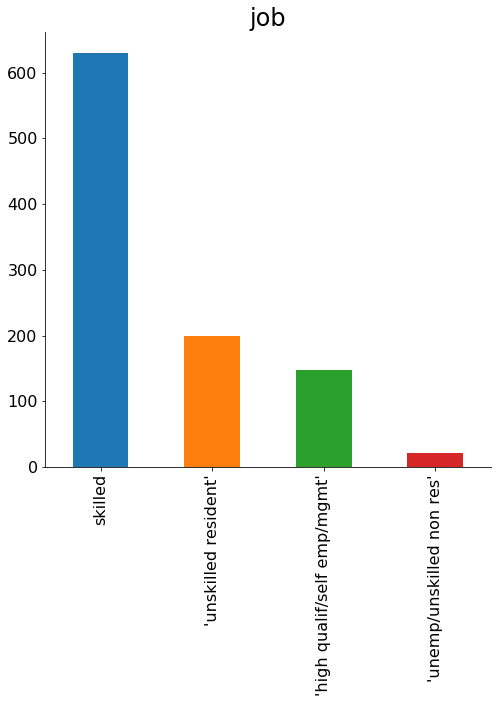

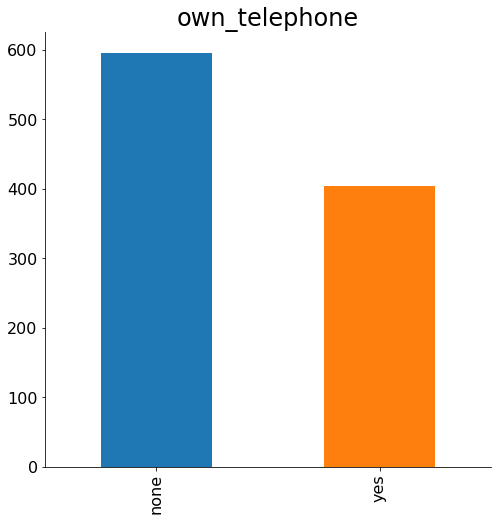

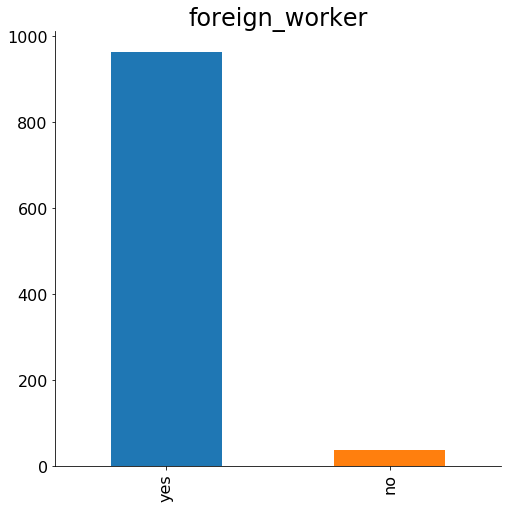

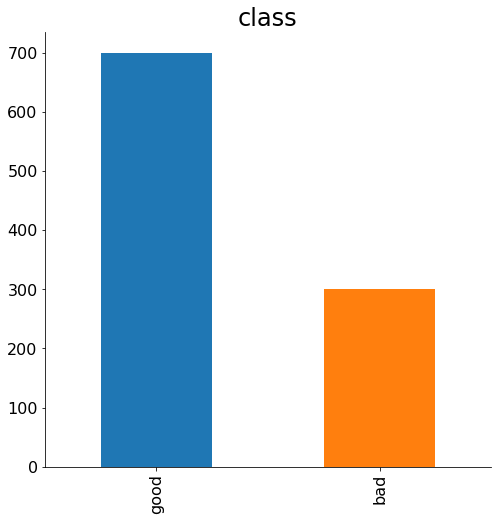

In [54]:
# Iterate through all the numeric data columns and plot the class seperation
for col in df.select_dtypes(include=['object']).columns:
    categorical_plot(df, col)